In [28]:
import os
import cv2
import matplotlib.pyplot as plt

In [29]:
def read_bboxes(label_path):
    with open(label_path, 'r') as f:
        bboxes = [line.strip().split() for line in f.readlines()]
    
    return [[int(bbox[0])] + [float(x) for x in bbox[1:]] for bbox in bboxes]

In [30]:
def display_cutmix_images(image_dir, label_dir=None, num_images_to_display=9, images_per_row=3):
    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    plt.figure(figsize=(20,10))
    for idx, img_file in enumerate(image_files[:num_images_to_display]):
        img_path = os.path.join(image_dir, img_file)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        if label_dir != None:
            label_path = os.path.join(label_dir, img_file.rsplit('.', 1)[0] + '.txt')
            
            bboxes = read_bboxes(label_path)
            for bbox in bboxes:
                class_id, x_center, y_center, width, height = bbox
                x_center *= image.shape[1]
                y_center *= image.shape[0]
                width *= image.shape[1]
                height *= image.shape[0]
                x1 = int(x_center - width / 2)
                y1 = int(y_center - height / 2)
                x2 = int(x_center + width / 2)
                y2 = int(y_center + height / 2)
                cv2.rectangle(image, (x1,y1), (x2,y2), (255,0,0), 2)

        plt.subplot((num_images_to_display // images_per_row) + 1, images_per_row, idx + 1)
        plt.imshow(image)
        plt.title(f"Cutmix Image {idx+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

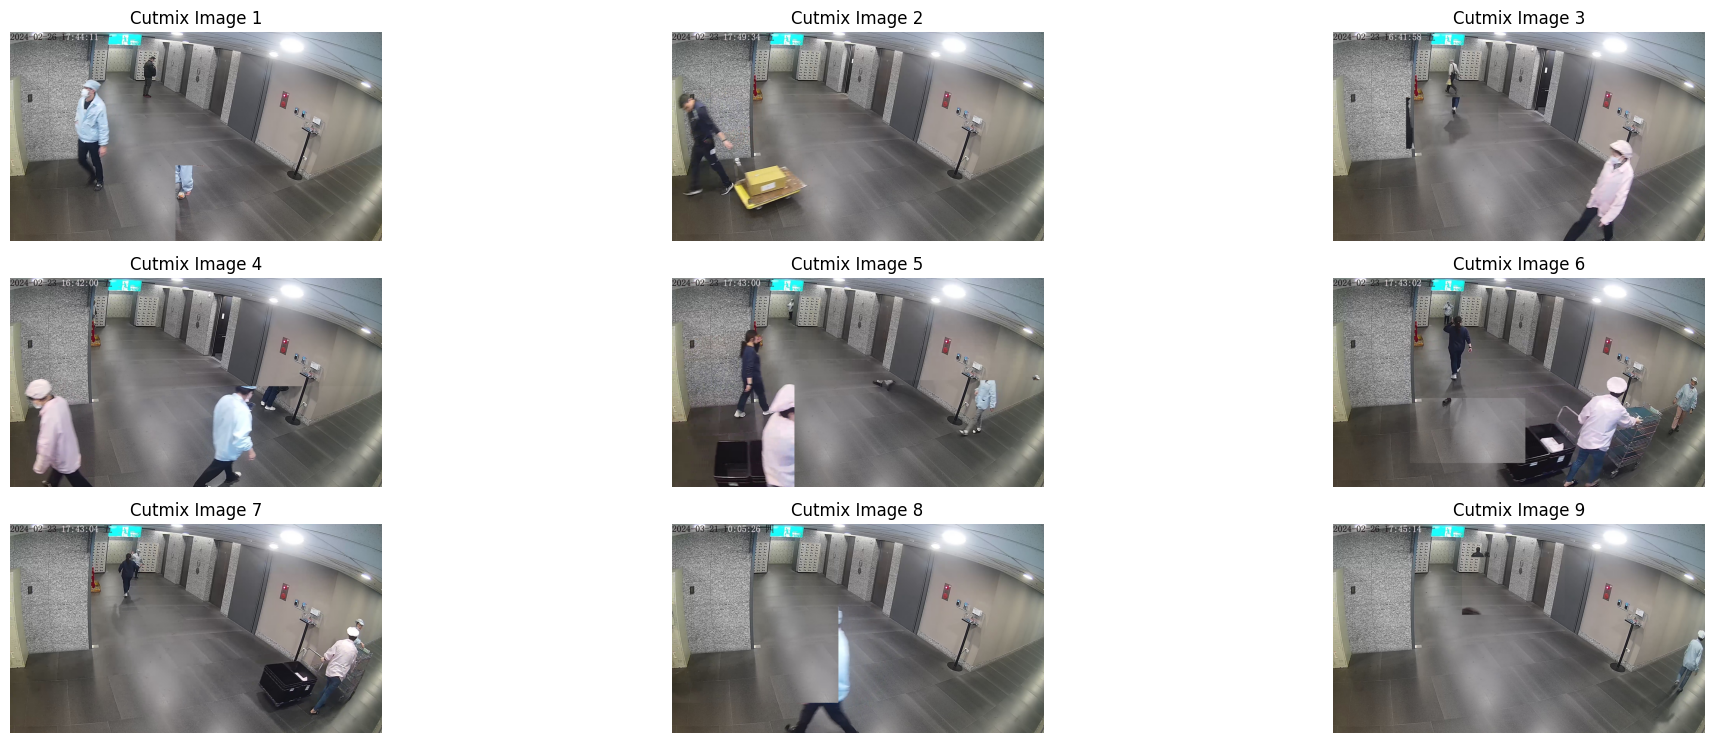

In [31]:
image_dir = 'test_cutmix_1/images/train'
label_dir = 'test_cutmix_1/labels/train'

display_cutmix_images(image_dir, num_images_to_display=9, images_per_row=3)